In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
# from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

import data
kd = data.Kaya_data

估计CG

In [3]:
# 已知数据
GDP = kd["GDP"]
MTCO2e = kd["MTCO2e"]

# 计算总体CI (排除无效数据)
CI_values = [mtco2e / gdp for gdp, mtco2e in zip(GDP, MTCO2e) if gdp != -1 and mtco2e != -1]

# 计算均值和标准差
mean_CI = np.mean(CI_values)
std_CI = np.std(CI_values, ddof=1)  # 使用样本标准差

# 计算95%的置信区间
n = len(CI_values)
alpha = 0.05  # 95%置信区间
t_score = stats.t.ppf(1 - alpha / 2, df=n - 1)  # t分布临界值
margin_of_error = t_score * (std_CI / np.sqrt(n))

# 置信区间
CI_lower = mean_CI - margin_of_error
CI_upper = mean_CI + margin_of_error

mean_CI, CI_lower, CI_upper

(0.17768003326499263, 0.17022531662734983, 0.18513474990263543)

In [4]:
# 经验公式算出每年的旅游收入
tourism_income = kd["Tourism_Numbers"]
tourism_income = [i * 632 for i in tourism_income]
# print(tourism_income)

预测ratio

10 10
[85.91571513734122, 92.77766410401226, 106.28607924622482, 119.28443910512954, 116.49192786644336, 119.15962976785639, 57.53798190344494, 101.21215240227299, 112.87600266984957, 106.88908469682596]
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.19073D+00    |proj g|=  6.08224D-01

At iterate    5    f=  3.98615D+00    |proj g|=  1.01113D-02

At iterate   10    f=  3.97088D+00    |proj g|=  1.01077D-02

At iterate   15    f=  3.93884D+00    |proj g|=  1.04247D-02


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  3.89527D+00    |proj g|=  3.62179D-02

At iterate   25    f=  3.87288D+00    |proj g|=  9.97396D-03

At iterate   30    f=  3.87247D+00    |proj g|=  3.04845D-03

At iterate   35    f=  3.87185D+00    |proj g|=  1.75633D-03

At iterate   40    f=  3.87167D+00    |proj g|=  5.14546D-04

At iterate   45    f=  3.86900D+00    |proj g|=  6.25898D-02

At iterate   50    f=  3.85373D+00    |proj g|=  2.08519D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     67      1     0     0   2.085D-02   3.854D+00
  F =   3.8537305002657711     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


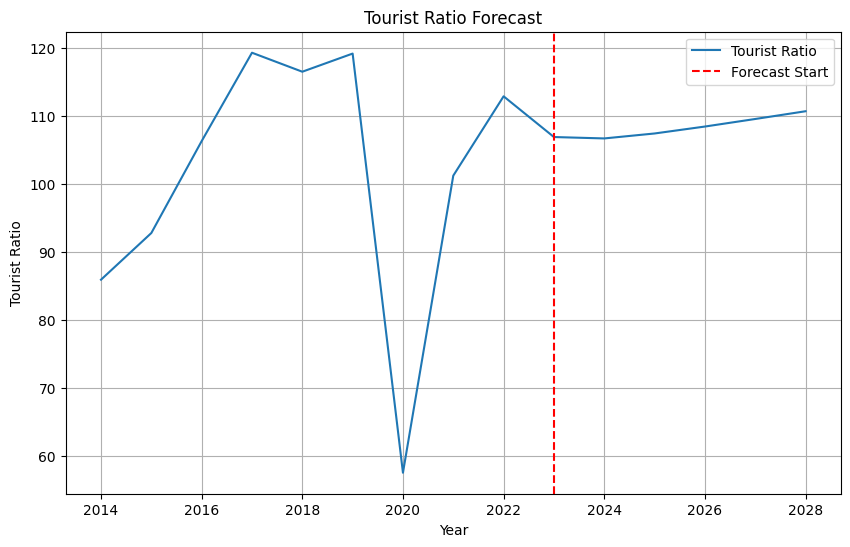

In [5]:
# # 旅游收入占GDP的比例
# tourism_income_ratio = [i / j for i, j in zip(tourism_income, GDP) if j != -1]
# print(tourism_income_ratio)

# # 线性预测后面的比例
# X = np.arange(2014, 2024).reshape(-1, 1)
# y = np.array(tourism_income_ratio).reshape(-1, 1)
# assert len(X) == len(y)

# lr_model = LinearRegression()
# lr_model.fit(X, y)

# X = np.arange(2014, 2029).reshape(-1, 1)
# tourism_income_ratio_pred = lr_model.predict(X)

# # 旅游收入预测
# # 画图
# plt.figure(figsize=(10, 6))
# plt.plot(X, tourism_income_ratio_pred, label="Tourism Income Ratio Prediction")
# plt.plot(np.arange(2014, 2024), tourism_income_ratio, label="Tourism Income Ratio")
# plt.legend()
# plt.xlabel("Year")
# plt.ylabel("Tourism Income Ratio")
# plt.title("Tourism Income Ratio Prediction")
# plt.show()

# # # SARIMA模型预测
# data = {
#     "Year": [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
#     "GDP": [2524869000, 2435418000, 2437578000, 2511152000, 2467392000, 2414435000, 2292657000, 2421944000, 2423728000, 2387533000],
#     "Tourism_Numbers": [9.61e5, 9.83e5, 1.015e6, 1.072e6, 1.151e6, 1.306e6, 1.259667e6, 1.213333e6, 1.167e6, 1.67e6],
#     "GDP": [2524869000, 2435418000, 2437578000, 2511152000, 2467392000, 2414435000, 2292657000, 2421944000, 2423728000, 2387533000]
# }
data = {
    "Year": [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "GDP": [523368, 520554, 484813, 479694, 511699, 523008, 473690, 564108, 612414, 677909],
    "MTCO2e": [90000, 90000, 90000, 90000, 90000, 90000, -1, -1, -1, -1],
    "Tourism_Numbers": [71148, 74919, 78367, 85316, 87135, 89314, 38294, 78646, 93353, 95937],
}

tourism_number = data["Tourism_Numbers"]
# 人均旅游以2%的增长率增长，初始为632
tourism_spend = [632 * (1 + 0.02) ** i for i in range(20)]
tmp = tourism_spend[0:10]
print(len(tourism_number), len(tmp))

assert len(tourism_number) == len(tmp)
tourism_income = [i * j for i, j in zip(tourism_number, tmp)]
GDP = data["GDP"]

tourism_income_ratio = [i / j for i, j in zip(tourism_income, GDP) if j != -1]

print(tourism_income_ratio)


df = pd.DataFrame(data)
df.set_index('Year', inplace=True)
df["Pande_Impact"] = [0, 0, 0, 0, 0, 0, 0.2, 1, 0.8, 0]
df["Tourist_Ratio"] = tourism_income_ratio

# 扩展预测年份到2030年
forecast_years = list(range(2024, 2029))
forecast_exog = np.zeros(len(forecast_years))  # 假设未来几年疫情影响因子为0

model0 = SARIMAX(df["Tourist_Ratio"], exog=df['Pande_Impact'], order=(1, 2, 2))
fitted_model0 = model0.fit()

forecast0 = fitted_model0.forecast(steps=len(forecast_years), exog=forecast_exog)

forecast_df0 = pd.DataFrame({

    'Year': forecast_years,
    'Tourist_Ratio': forecast0
})

forecast_df0.set_index('Year', inplace=True)

combined_df0 = pd.concat([df, forecast_df0])
plt.figure(figsize=(10, 6))

plt.plot(combined_df0.index, combined_df0['Tourist_Ratio'], label='Tourist Ratio')
plt.axvline(x=2023, color='r', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.ylabel('Tourist Ratio')
plt.title('Tourist Ratio Forecast')
plt.legend()
plt.grid(True)
plt.show()

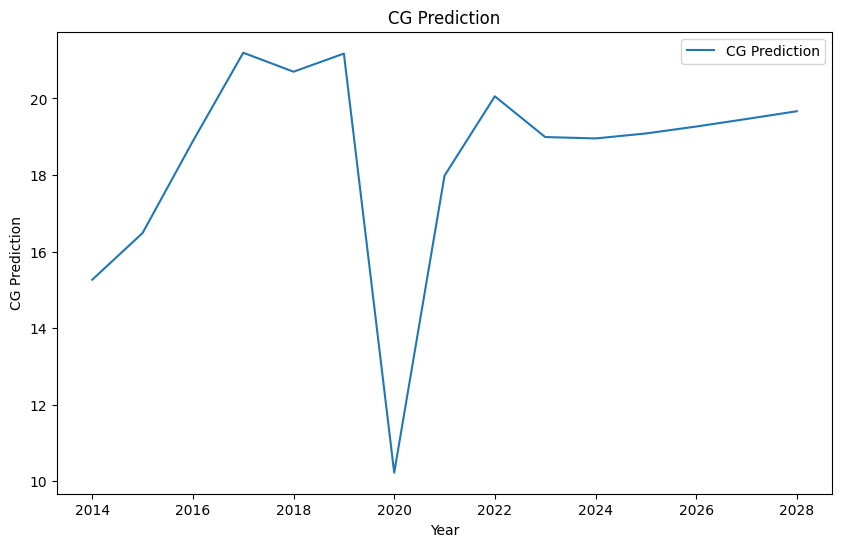

In [6]:
# 预测旅游的CI：用总的CI乘以预测的旅游收入比例
CI_pred = [mean_CI * i for i in combined_df0['Tourist_Ratio']]

CI_pred = [float(ci) for ci in CI_pred]
CI_pred

# 画图
plt.figure(figsize=(10, 6))
plt.plot(combined_df0.index, CI_pred, label="CG Prediction")
plt.xlabel("Year")
plt.ylabel("CG Prediction")
plt.title("CG Prediction")
plt.legend()
plt.show()


探究CI和旅游人数的关系

(15, 1) (15, 1)
方程：
CI =  [[4.06701901e-05]] * n +  [14.52798213]
相关系数：
0.2704664875623721


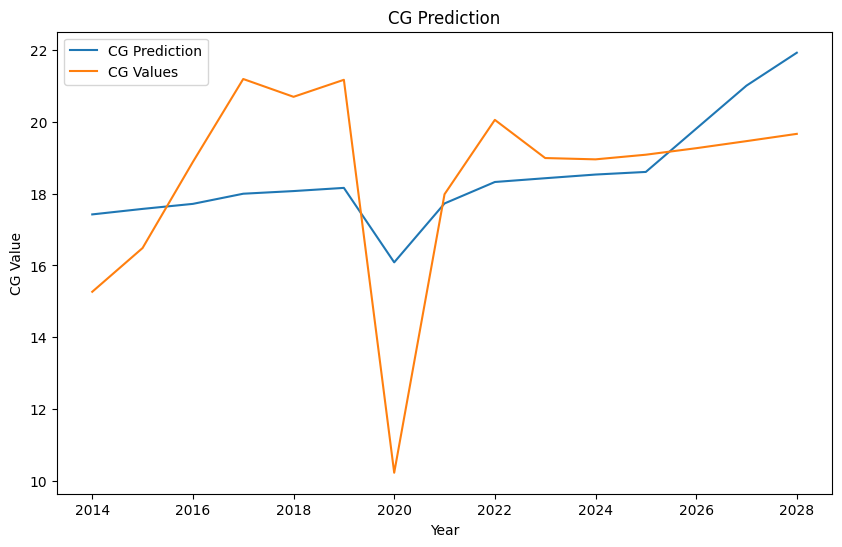

In [7]:
X = np.array(kd["Tourism_Numbers"]).reshape(-1, 1)
y = np.array(CI_pred).reshape(-1, 1)

print(X.shape, y.shape)
assert X.shape == y.shape

model_CI_num = LinearRegression()
model_CI_num.fit(X, y)

# 方程
print("方程：")
print("CI = ", model_CI_num.coef_, "* n + ", model_CI_num.intercept_)

# 相关系数
print("相关系数：")
r = model_CI_num.score(X, y)
print(r)

# 预测并画图
y_pred = model_CI_num.predict(X)

plt.figure(figsize=(10, 6))
plt.plot(kd["Year"], y_pred, label="CG Prediction")
plt.plot(kd["Year"], CI_pred, label="CG Values")
plt.xlabel("Year")
plt.ylabel("CG Value")
plt.title("CG Prediction")
plt.legend()
plt.show()

预测GDP

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.88253D+00    |proj g|=  1.84158D+00

At iterate    5    f=  9.77139D+00    |proj g|=  1.92231D-01

At iterate   10    f=  9.76398D+00    |proj g|=  2.80849D-01

At iterate   15    f=  9.74411D+00    |proj g|=  1.57217D-01

At iterate   20    f=  9.73500D+00    |proj g|=  1.23277D-01

At iterate   25    f=  9.73221D+00    |proj g|=  2.71380D-02

At iterate   30    f=  9.73151D+00    |proj g|=  1.53025D-02


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/pyt


At iterate   35    f=  9.73141D+00    |proj g|=  5.65850D-03

At iterate   40    f=  9.73141D+00    |proj g|=  2.13523D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     47      1     0     0   8.399D-05   9.731D+00
  F =   9.7314050764511624     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                GDP   MTCO2e  Tourism_Numbers  Pande_Impact  Tourist_Ratio
Year                                                                      
2014  523368.000000  90000.0          71148.0           0.0      85.915715
2015  520554.000000  90000.0          74919.0           0.0      92.777664

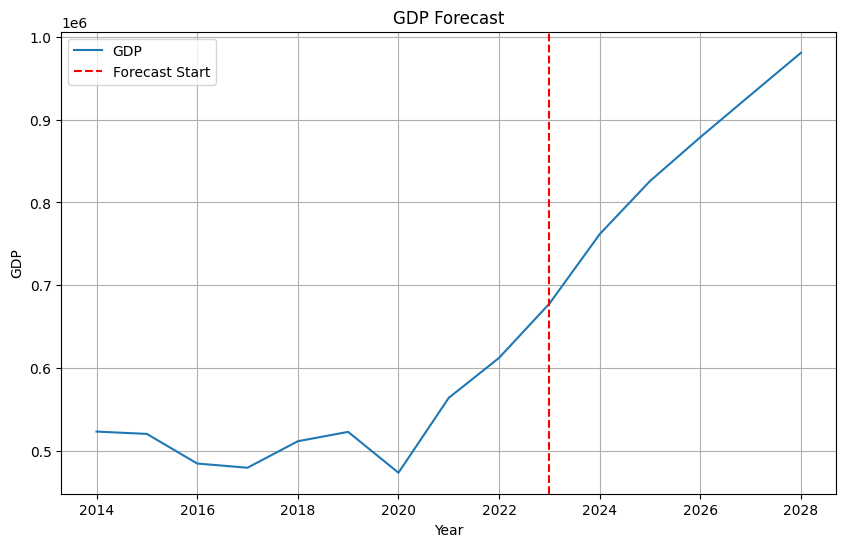

In [8]:
model = SARIMAX(df['GDP'], exog=df['Pande_Impact'], order=(1, 2, 3))
fitted_model = model.fit()



forecast = fitted_model.forecast(steps=len(forecast_years), exog=forecast_exog)

forecast_df = pd.DataFrame({
    'Year': forecast_years,
    'GDP': forecast
})
forecast_df.set_index('Year', inplace=True)

# 合并已知数据和预测数据
combined_df = pd.concat([df, forecast_df])

print(combined_df)

combined_df.to_csv('combined_df.csv')

# 绘制图像
plt.figure(figsize=(10, 6))
plt.plot(combined_df.index, combined_df['GDP'], label='GDP')
plt.axvline(x=2023, color='r', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Forecast')
plt.legend()
plt.grid(True)
plt.show()

kaya公式

[686421710.1239715, 796143369.8375139, 973118338.894133, 1212747809.206753, 1233800268.245673, 1319487405.2460952, 278639122.62898326, 1026753536.0022365, 1386394987.1382468, 1376184756.1053972, 1437797276.2811515, 1503409673.0548854, 2005096791.5808263, 2536040474.1291127, 2983462641.310758]


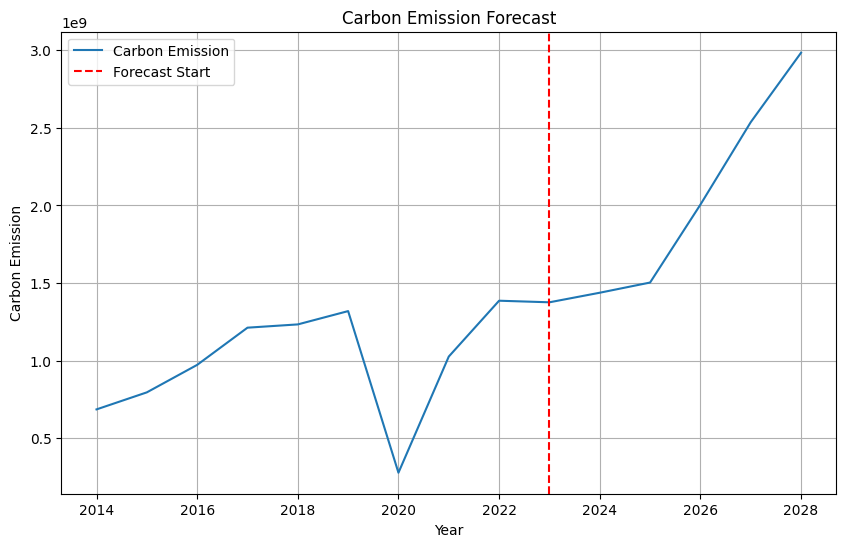

In [9]:
"""
碳排放量 = 旅游人数n * 旅游消费 * CI
        = 旅游人数n * 旅游消费 * model_CI_num(旅游人数n)
        = 旅游人数n * 旅游消费 * ([5.58710278e-07] * n +  [0.0210651])
        
"""

C_tourism = [i * j * k for i, j, k in zip(kd["Tourism_Numbers"], tourism_spend, CI_pred)]
print(C_tourism)

# 绘制图像

plt.figure(figsize=(10, 6))
plt.plot(range(2014, 2029), C_tourism, label='Carbon Emission')
plt.axvline(x=2023, color='r', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.ylabel('Carbon Emission')
plt.title('Carbon Emission Forecast')
plt.legend()
plt.grid(True)
plt.show()


碳排放定价

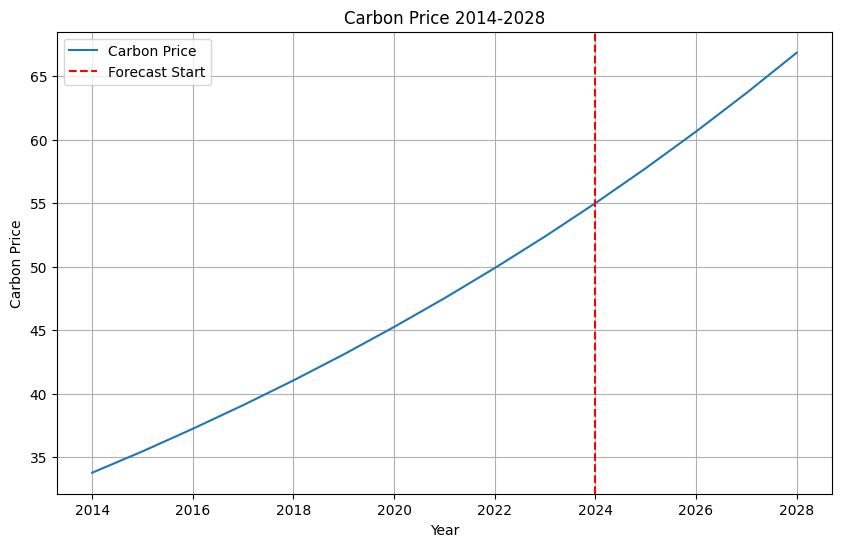

In [10]:
# 2024是55/吨， 25年开始按5%递增
C_price = [33.77, 35.45, 37.23, 39.09, 41.04, 43.09, 45.25, 47.51, 49.89, 52.38, 55, 57.75, 60.64, 63.67, 66.85]

# 画图
plt.figure(figsize=(10, 6))
plt.plot(range(2014, 2029), C_price, label='Carbon Price')
plt.axvline(x=2024, color='r', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.ylabel('Carbon Price')
plt.title('Carbon Price 2014-2028')
plt.legend()
plt.grid(True)
plt.show()

碳代价 = 碳排放量 * 碳排放定价

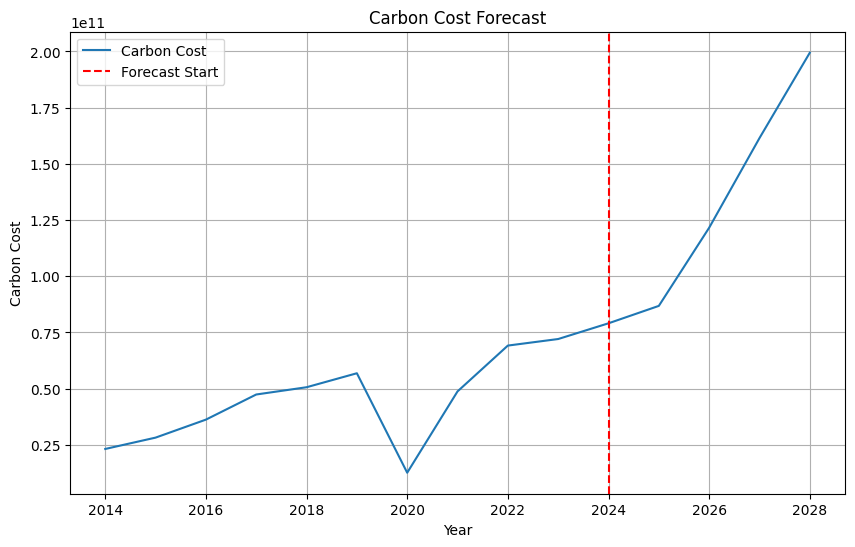

NameError: name 'tourism' is not defined

In [11]:
C_cost = [i * j for i, j in zip(C_tourism, C_price)]

# 绘制图像
plt.figure(figsize=(10, 6))
plt.plot(range(2014, 2029), C_cost, label='Carbon Cost')
plt.axvline(x=2024, color='r', linestyle='--', label='Forecast Start')
plt.xlabel('Year')
plt.ylabel('Carbon Cost')
plt.title('Carbon Cost Forecast')
plt.legend()
plt.grid(True)
plt.show()


# 用二次多项式拟合
coefficients = np.polyfit(tourism, C_cost, 2)
poly = np.poly1d(coefficients)

# 生成拟合曲线
tourism_fit = np.linspace(min(tourism), max(tourism), 100)
C_cost_fit = poly(tourism_fit)

# 绘制图像
plt.figure(figsize=(10, 6))
plt.scatter(tourism, C_cost, label='Carbon Cost')
plt.plot(tourism_fit, C_cost_fit, color='red', label='Quadratic Fit')
plt.xlabel('Number of Tourists')
plt.ylabel('Carbon Cost')
plt.title('Carbon Cost vs Number of Tourists')
plt.legend()
plt.grid(True)
plt.show()

# 输出系数
print("二次多项式系数：")
print(coefficients)


碳代价与旅游人口的关系

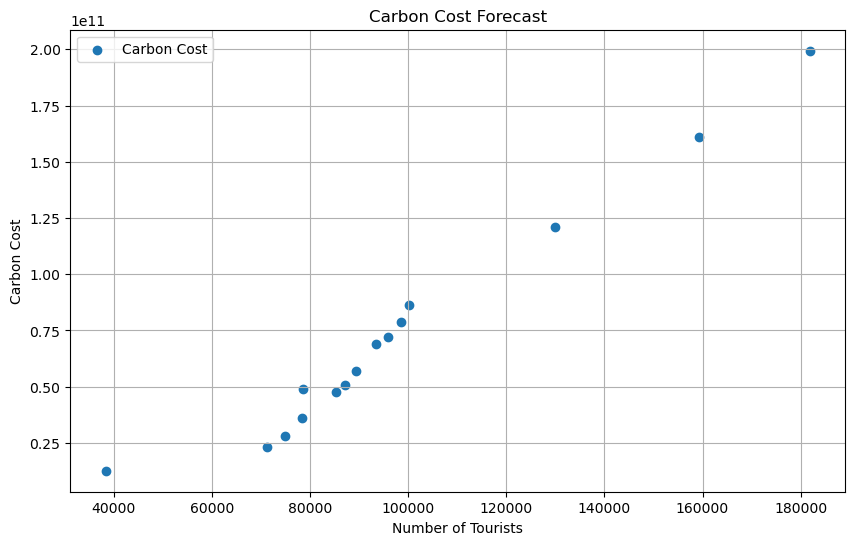

In [40]:
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c
# 绘制图像
tourism = kd["Tourism_Numbers"]

plt.figure(figsize=(10, 6))
plt.scatter(tourism, C_cost, label='Carbon Cost')

plt.xlabel('Number of Tourists')
plt.ylabel('Carbon Cost')
plt.title('Carbon Cost Forecast')
plt.legend()
plt.grid(True)
plt.show()